# 线性逻辑回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [2]:
np.random.seed(0)
X=np.random.normal(0,1,size=(200,2))
y=np.array((X[:,0]**2)+(X[:,1]**2)<2,dtype='int')
y

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0])

In [3]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=233,stratify=y)

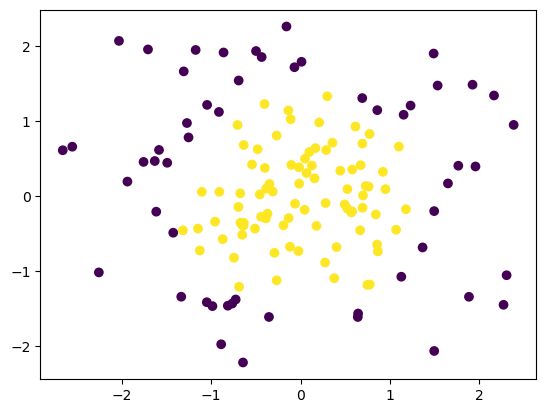

In [4]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.show()

In [5]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [6]:
clf.score(x_train,y_train)

0.7071428571428572

In [7]:
clf.score(x_test,y_test)

0.6666666666666666

# 多项式逻辑回归

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
poly=PolynomialFeatures(degree=2)
poly.fit(x_train)

PolynomialFeatures()

In [10]:
x2=poly.transform(x_train)
x2t=poly.transform(x_test)

In [11]:
clf.fit(x2,y_train)

LogisticRegression()

In [12]:
clf.score(x2,y_train)

1.0

In [13]:
clf.score(x2t,y_test)

0.9666666666666667

## 多分类OVR和OVO

In [14]:
from sklearn import datasets
iris=datasets.load_iris()
x=iris.data
y=iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=666)

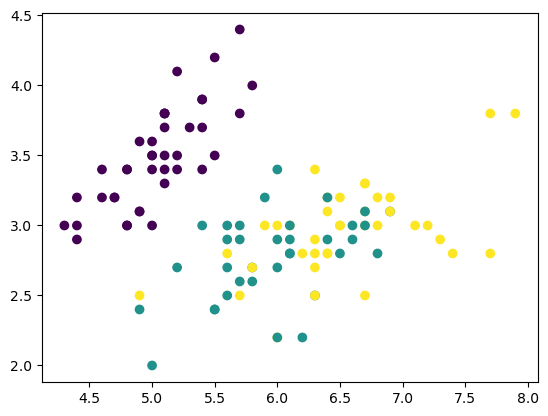

In [15]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.show()

## OVR :from sklearn.multiclass import OneVsRestClassifier

In [16]:
%%time
from sklearn.multiclass import OneVsRestClassifier
ovr=OneVsRestClassifier(clf)#传入用到的分类器
ovr.fit(x_train,y_train)
ovr.score(x_test,y_test)

CPU times: total: 31.2 ms
Wall time: 25.9 ms


0.9736842105263158

## OVO:from sklearn.multiclass import OneVsOneClassifier

In [17]:
%%time
from sklearn.multiclass import OneVsOneClassifier
ovr=OneVsOneClassifier(clf)#传入用到的分类器
ovr.fit(x_train,y_train)
ovr.score(x_test,y_test)

CPU times: total: 15.6 ms
Wall time: 20.2 ms


1.0